In [110]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [111]:
df= pd.read_csv("./datasets/updated_file.csv")
df = df.dropna(subset=["Original_Text", "Color", "Label"])

In [112]:
df = df.drop(columns=["Name"], axis=1)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1209 entries, 0 to 1219
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Original_Text  1209 non-null   object
 1   Color          1209 non-null   object
 2   Label          1209 non-null   object
dtypes: object(3)
memory usage: 37.8+ KB


In [114]:
nltk.download('stopwords')
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
def textPreprocessor(featureRecord):
    #Remove punctuations
    removePunctuation = [char for char in featureRecord if char not in string.punctuation]
    sentences =''.join(removePunctuation)

    #convert sentences to words
    words = sentences.split(" ")

    #normalize
    wordNormalized=[word.lower() for word in words]

    #remove stropwords
    finalWords=[word for word in wordNormalized if word not in stopwords.words("portuguese")]

    finalWords = [stemmer.stem(word) for word in finalWords]

    #joined = ' '.join(finalWords)

    return finalWords

In [116]:
!pip3 install spacy
!pip3 install unidecode

^C



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!python3 -m spacy download pt_core_news_sm;

C:\Users\alexa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe: No module named spacy


In [174]:
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from unidecode import unidecode


# Download Portuguese stopwords
stop_words = set(stopwords.words('portuguese'))

# Load the spaCy model for Portuguese
nlp = spacy.load("pt_core_news_sm")
remover  = ["da", "de", "do", "no", "00", "000", "0000", "em"]
stop_words.update(remover)
# Process the text with spaCy

def preprocess_text(text):

    doc = nlp(text)
    

    # Retrieve the base form (lemma) of each word and remove punctuation
    lemmatized_words = [token.lemma_ for token in doc if token.text not in string.punctuation]

    # Remove stopwords and newline characters after lemmatization
    filtered_words = [word for word in lemmatized_words if word.lower() not in stop_words and word != '\n']

    # Remove accents from words
    cleaned_words = [unidecode(word) for word in filtered_words]

    # Reconstruct the text without stopwords, punctuation, accents, and newline characters
    preprocessed_text = ' '.join(cleaned_words)
    return preprocessed_text


# Example usage
text = "Estou correndo e pulando, mas com stopwords e \n que precisamos remover."
processed_text = preprocess_text(text)
print(processed_text)

correndo pular stopwords 
  precisar remover


NameError: name 'doc' is not defined

In [ ]:
df_sample = df.sample(frac=0.1, random_state=42)

In [ ]:
df_sample["Original_Text"] = df_sample["Original_Text"].apply(preprocess_text)

EXCELENTISSIMA SENHORA DOUTORA JUIZA DIREITO de o 6a VARA CIVEL de o COMARCA ANAPOLIS-GO DISTRIBUICAO DEPENDENCIA ART 286 INCISO I CPC PROCESSO No 00) 00000-0000 .62.2015.8.09.0006 IMISSAO POSSE PROCESSO No 51470.75.2013.8.09.0006 ANULATORIA RC EMPREENDIMENTOS IMOBILIARIOS LTDA pessoa juridico direito privado sede em o Endereco.643/ 0001-56 em este ato representar Nome brasileiro casado empresario portador de o cedula identidade no 00000-00 2a ver SSP-GO de o C.P. F no 000.000. 000-00 residente domiciliar em o cidade Anapolis-GO JM EMPREENDIMENTOS IMOBILIARIOS LTDA pessoa juridico direito privado sede em o Endereco.818/ 0001-83 em este ato representar procuradora Nome brasileira casado empresario portadora de o RG no 00000-00e de o CPF no 000.000. 000-00 residente domiciliar em o cidade Anapolis-GO SOLIDA EMPREENDIMENTOS IMOBILIARIOS LTDA pessoa juridico direito privado sede em o Endereco.175/ 0001-60 em este ato representar socia Nome brasileira divorciar empresario portadora de o RG 

In [ ]:
df_sample.head(3)

,Original_Text,Color,Label
101,EXCELENTISSIMA SENHORA DOUTORA JUIZA DIREITO d...,Parda,Fechado
435,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO de o...,Parda,Aberto
311,EXCELENTISSIMO(A SENHOR(A DOUTOR(A JUIZ(A DIRE...,Parda,Aberto


In [ ]:
df_sample

,Original_Text,Color,Label
101,EXCELENTISSIMA SENHORA DOUTORA JUIZA DIREITO d...,Parda,Fechado
435,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO de o...,Parda,Aberto
311,EXCELENTISSIMO(A SENHOR(A DOUTOR(A JUIZ(A DIRE...,Parda,Aberto
109,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO de o...,Parda,Aberto
1010,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO de o...,Branca,Aberto
...,...,...,...
1154,EXMO SR DR JUIZ DIREITO VARAS de o COMARCA JAU...,Negra,Aberto
360,JUIZO de o VARA FEDERAL CIVEL CRIMINAL de o SS...,Parda,Fechado
474,EXCELENTISSIMO(A SENHOR(A DOUTOR(A JUIZ(A DIRE...,Negra,Aberto
279,ADVOGADO MERITISSIMO JUIZO FEDERAL de o 1a VAR...,Parda,Aberto


In [ ]:
df["Original_Text"] = df["Original_Text"].apply(preprocess_text)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'Color' column
df['Color'] = label_encoder.fit_transform(df['Color'])

# TF - IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer with stop words in Portuguese and using L2 normalization
Tfidf = TfidfVectorizer(norm='l2')

# Transform the text data in the "remainder__Original_Text" column of your DataFrame
X = Tfidf.fit_transform(df["Original_Text"]).toarray()

# Converter o vetor TF-IDF de volta para as palavras
tfidf_vector = X[0]
vocab = Tfidf.get_feature_names_out()
words_tfidf = [(vocab[i], tfidf_vector[i]) for i in range(len(tfidf_vector)) if tfidf_vector[i] > 0]

# Exibir as palavras representadas no vetor TF-IDF
for word, tfidf in words_tfidf:
    print(f"A palavra '{word}' tem um TF-IDF de {tfidf:.3f}")

words_tfidf = [(vocab[i], X[i]) for i in range(len(X)) if X[i].any() > 0]



A palavra '00' tem um TF-IDF de 0.112
A palavra '000' tem um TF-IDF de 0.059
A palavra '0000' tem um TF-IDF de 0.066
A palavra '0000000' tem um TF-IDF de 0.043
A palavra '17' tem um TF-IDF de 0.061
A palavra '2023' tem um TF-IDF de 0.081
A palavra '3a' tem um TF-IDF de 0.075
A palavra '487' tem um TF-IDF de 0.106
A palavra 'acao' tem um TF-IDF de 0.121
A palavra 'adentrar' tem um TF-IDF de 0.120
A palavra 'administrativo' tem um TF-IDF de 0.076
A palavra 'advogado' tem um TF-IDF de 0.039
A palavra 'alegar' tem um TF-IDF de 0.060
A palavra 'alinear' tem um TF-IDF de 0.116
A palavra 'ambito' tem um TF-IDF de 0.098
A palavra 'art' tem um TF-IDF de 0.042
A palavra 'assim' tem um TF-IDF de 0.044
A palavra 'autor' tem um TF-IDF de 0.049
A palavra 'autoral' tem um TF-IDF de 0.325
A palavra 'baixa' tem um TF-IDF de 0.209
A palavra 'bem' tem um TF-IDF de 0.041
A palavra 'caber' tem um TF-IDF de 0.066
A palavra 'civel' tem um TF-IDF de 0.046
A palavra 'comarca' tem um TF-IDF de 0.041
A palavra '

# Modelo

In [ ]:
y = df["Color"]

In [ ]:
X

array([[0.11191528, 0.05865849, 0.06563456, ..., 0.        , 0.        ,
        0.        ],
       [0.0691022 , 0.09658331, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07585575, 0.08945663, 0.04448686, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07664865, 0.06026113, 0.0337139 , ..., 0.        , 0.        ,
        0.        ],
       [0.02711466, 0.01705402, 0.00636074, ..., 0.        , 0.        ,
        0.        ],
       [0.1030136 , 0.21597131, 0.02013801, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
y

0       1
1       0
2       0
3       0
4       1
       ..
1215    0
1216    0
1217    0
1218    2
1219    0
Name: Color, Length: 1209, dtype: int32

In [ ]:
df

,Original_Text,Color,Label
0,EXCELENTISSIMO DOUTOR JUIZ DIREITO de o 3a VAR...,1,Aberto
1,EXCELENTISSIMO SR DR JUIZ DIREITO VARAS de o F...,0,Aberto
2,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO de o...,0,Aberto
3,EXMO SR DR JUIZ DIREITO de o 2a VARA de o FAMI...,0,Fechado
4,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO de o...,1,Aberto
...,...,...,...
1215,jUIZO 5o JUIZADO ESPECIAL CIVEL de o COMARCA R...,0,Aberto
1216,EXCELENTISSIMO SENHOR DESEMBARGADOR RELATOR de...,0,Aberto
1217,EXMO SR JUIZ FEDERAL JUIZADO ESPECIAL FEDERAL ...,0,Fechado
1218,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO JUIZ...,2,Aberto


In [ ]:
df_sample = pd.read_csv("./datasets/updated_file.csv")

In [ ]:
df_sample

,Name,Original_Text,Color,Label
0,Marcio Rocha,EXCELENTÍSSIMO DOUTOR JUIZ DE DIREITO DA 3a VA...,Negra,Aberto
1,Antonio Marcos Da Silva,EXCELENTÍSSIMO (A). SR (A). DR (A). JUIZ (A) D...,Branca,Aberto
2,Felipe Ribeiro Souza,EXCELENTÍSSIMO (A) SENHOR (A) DOUTOR (A) JUIZ ...,Branca,Aberto
3,Renata Barbosa De Almeida,EXMO. SR. DR. JUIZ DE DIREITO DA 2a VARA DA FA...,Branca,Fechado
4,Luiz Dos Santos,EXCELENTÍSSIMO SENHOR DOUTOR JUIZ DE DIREITO D...,Negra,Aberto
...,...,...,...,...
1215,Lincoln Assuncao,AO JUÍZO DO 5º JUIZADO ESPECIAL CIVEL DA COMAR...,Branca,Aberto
1216,Clarissa Rodrigues,EXCELENTÍSSIMO SENHOR DESEMBARGADOR RELATOR DA...,Branca,Aberto
1217,Maria Lucilia Borges,EXMO (A) SR (A) JUIZ (A) FEDERAL DO JUIZADO ES...,Branca,Fechado
1218,Jose Das Dores De Oliveira,EXCELENTÍSSIMO SENHOR DOUTOR JUIZ DE DIREITO D...,Parda,Aberto


# PCA

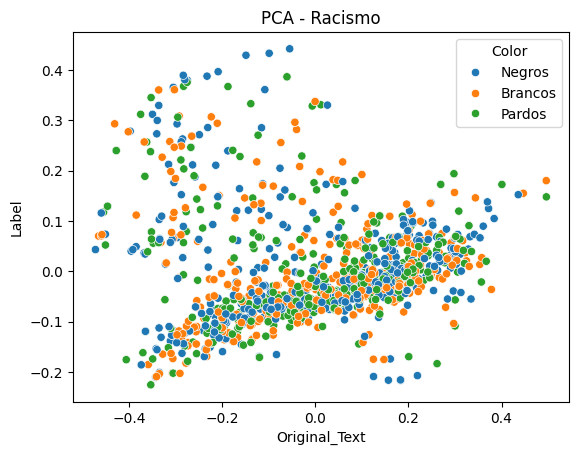

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Instantiate the PCA model with the desired number of components
# In this example, we set n_components to 2 for 2D visualization
pca = PCA(n_components=3)

# Fit the PCA model and transform the data
X_pca = pca.fit_transform(X)

# Create a DataFrame for visualization purposes
df_pca = pd.DataFrame(data=X_pca, columns=['Original_Text', 'Color', "Label"])

id_mapping = {0: 'Brancos', 1: 'Negros', 2: 'Pardos'}
df_pca['Color'] = y.map(id_mapping)



# Visualize the transformed data
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Original_Text', y='Label', hue='Color', data=df_pca)
plt.title('PCA - Racismo')
plt.show()


In [ ]:
from datetime import datetime

# Get the current date and time
current_datetime = datetime.now()

# Format the date and time as a string
formatted_datetime = current_datetime.strftime("%Y-%m-%d %H:%M:%S")


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

# Avaliação

In [ ]:
#Creating a function to display model results
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluation_parametrics(name,y_test, y_pred):
    cm_test = confusion_matrix(y_test, y_pred )
    t1 = ConfusionMatrixDisplay(cm_test, display_labels=["Brancos","Negros","Pardos"])    
    print("Classification Report for Data Test")
    print(classification_report(y_test, y_pred))
    t1.plot()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression  # Replace with your model

# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds

# Replace 'LogisticRegression()' with your specific model instantiation
model = LogisticRegression(random_state=42, max_iter=1000, solver="lbfgs", penalty="l2", C=1, tol=0.0001)

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())


Cross-Validation Results: [0.68595041 0.69834711 0.65702479 0.66115702 0.75103734]
Mean F1 Score: 0.6907033366482631


Classification Report for Data Test
              precision    recall  f1-score   support

           0       0.59      0.75      0.66        72
           1       0.75      0.77      0.76        92
           2       0.75      0.53      0.62        78

    accuracy                           0.69       242
   macro avg       0.69      0.68      0.68       242
weighted avg       0.70      0.69      0.68       242



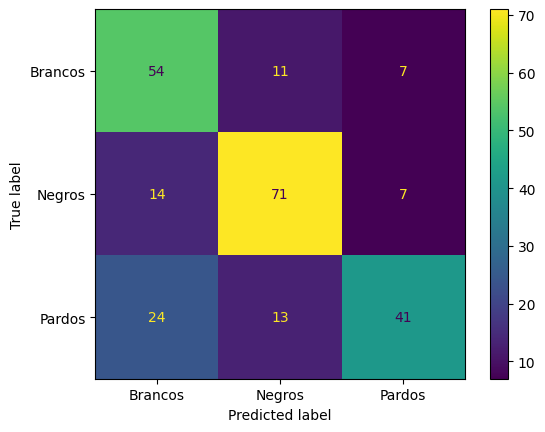

In [ ]:
#Visualizing model results
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

# SGD


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier  # Replace with your model

# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds

# Replace 'LogisticRegression()' with your specific model instantiation
model = SGDClassifier(random_state=42,alpha=0.0001, )

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())


Cross-Validation Results: [0.73140496 0.70661157 0.69008264 0.72727273 0.70124481]
Mean F1 Score: 0.7113233428208909


Classification Report for Data Test
              precision    recall  f1-score   support

           0       0.70      0.76      0.73        72
           1       0.74      0.85      0.79        92
           2       0.78      0.58      0.66        78

    accuracy                           0.74       242
   macro avg       0.74      0.73      0.73       242
weighted avg       0.74      0.74      0.73       242



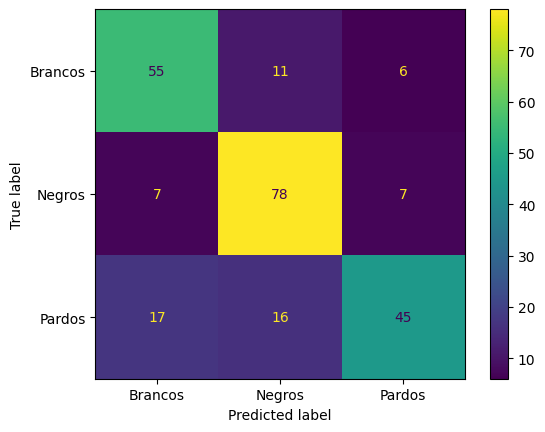

In [ ]:
#Visualizing model results
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluation_parametrics("Machine Learning - SGD", y_test, y_pred)

# KNN

In [ ]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds

# Replace 'LogisticRegression()' with your specific model instantiation
model = KNeighborsClassifier(n_neighbors=1, weights="uniform", algorithm="brute", leaf_size=30, p=2 )  # You can adjust the number of neighbors

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())


Cross-Validation Results: [0.69008264 0.73553719 0.66115702 0.66115702 0.70954357]
Mean F1 Score: 0.6914954905524502


Classification Report for Data Test
              precision    recall  f1-score   support

           0       0.61      0.71      0.66        72
           1       0.73      0.75      0.74        92
           2       0.73      0.60      0.66        78

    accuracy                           0.69       242
   macro avg       0.69      0.69      0.69       242
weighted avg       0.70      0.69      0.69       242



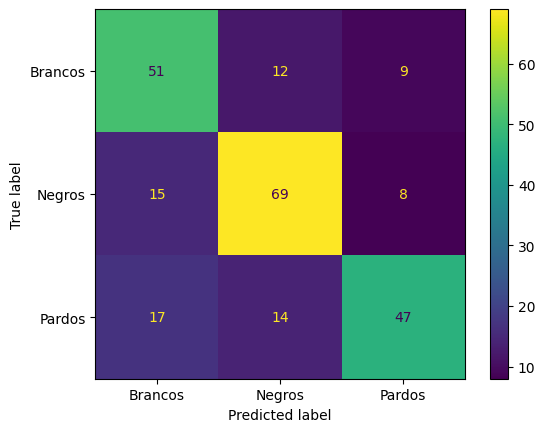

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluation_parametrics("Machine Learning - KNN", y_test, y_pred)


# SVM (SUPORT VECTOR MACHINE)

In [ ]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds

# Replace 'LogisticRegression()' with your specific model instantiation
model = LinearSVC(penalty="l2", loss='squared_hinge', tol=0.000001, C=10, multi_class='ovr', dual=True)

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())


Cross-Validation Results: [0.72727273 0.72727273 0.68595041 0.74793388 0.71784232]
Mean F1 Score: 0.7212544151435136


Classification Report for Data Test
              precision    recall  f1-score   support

           0       0.67      0.79      0.73        72
           1       0.79      0.80      0.80        92
           2       0.71      0.58      0.64        78

    accuracy                           0.73       242
   macro avg       0.72      0.72      0.72       242
weighted avg       0.73      0.73      0.72       242



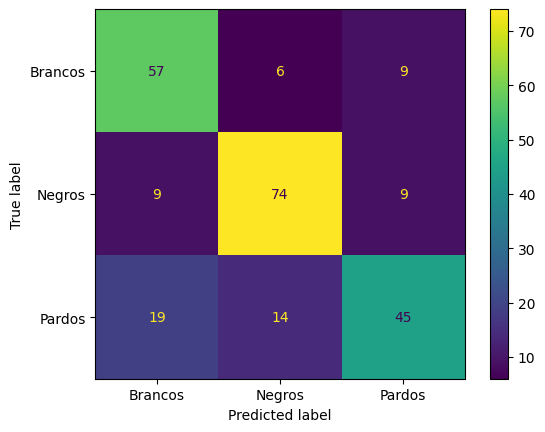

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluation_parametrics("Machine Learning - SVM", y_test, y_pred)


# RANDOM FOREST

In [ ]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds

# Replace 'LogisticRegression()' with your specific model instantiation
model = RandomForestClassifier(n_estimators=100, criterion='log_loss', max_depth=None, random_state=42)

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())

Cross-Validation Results: [0.65702479 0.66942149 0.65289256 0.69834711 0.67634855]
Mean F1 Score: 0.6708068996262131


Classification Report for Data Test
              precision    recall  f1-score   support

           0       0.56      0.68      0.62        72
           1       0.73      0.75      0.74        92
           2       0.65      0.50      0.57        78

    accuracy                           0.65       242
   macro avg       0.65      0.64      0.64       242
weighted avg       0.65      0.65      0.65       242



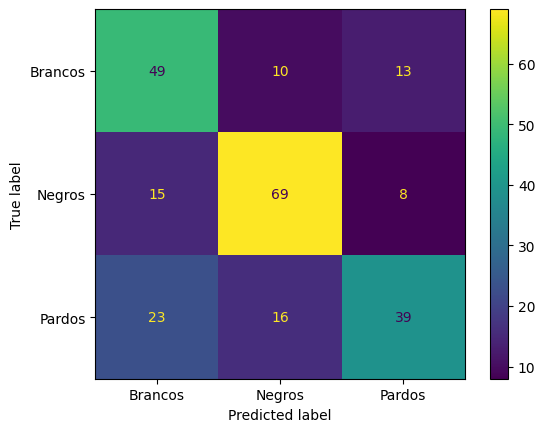

In [ ]:
#Visualizing model results
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluation_parametrics("Machine Learning - Random Forest", y_test, y_pred)

# Arvore de Decisão

Cross-Validation Results: [0.66528926 0.65289256 0.60330579 0.59090909 0.62655602]
Mean F1 Score: 0.6277905421624773


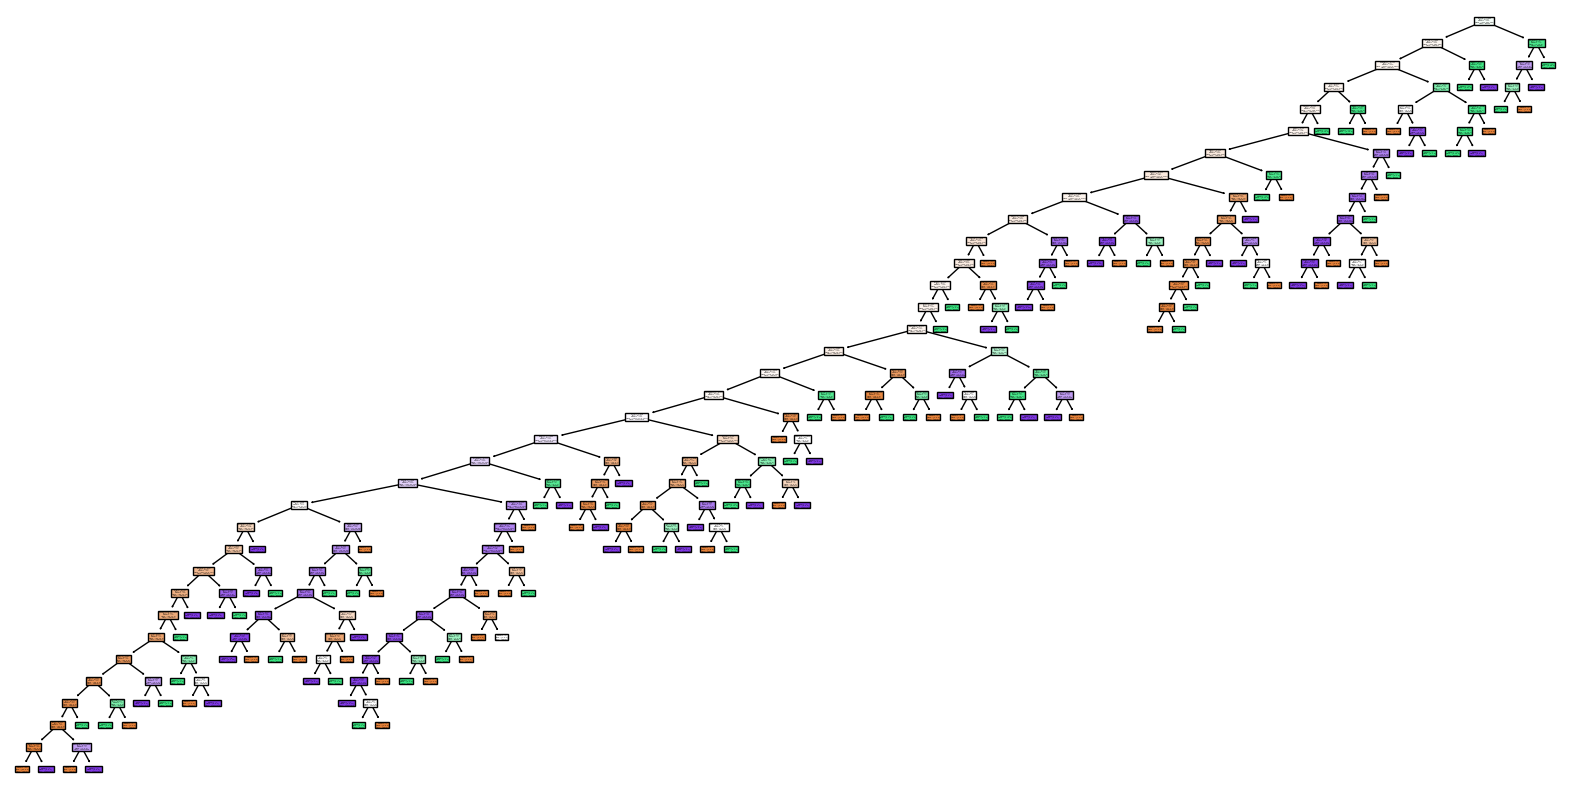

In [ ]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds


model = DecisionTreeClassifier(max_leaf_nodes=50,random_state=42)

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())

# Criar o classificador de árvore de decisão
clf = DecisionTreeClassifier()

# Treinar o classificador
clf.fit(X_train, y_train)

# Plotar a árvore de decisão
plt.figure(figsize=(20, 10))  # Ajustar o tamanho da figura conforme necessário
plot_tree(clf, feature_names=vocab, class_names=["Ambiguo", "Ganho","Inconclusivo", "Perdido"], filled=True)


plt.show()

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

# Carregar o DataFrame
df = pd.read_csv("./datasets/updated_file.csv", encoding="utf-8")
df = df.dropna(subset=["Original_Text", "Color", "Label"])

# Inicializar o vetorizador TF-IDF
df["Original_Text"].apply(preprocess_text)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["Original_Text"])
y = df["Color"]


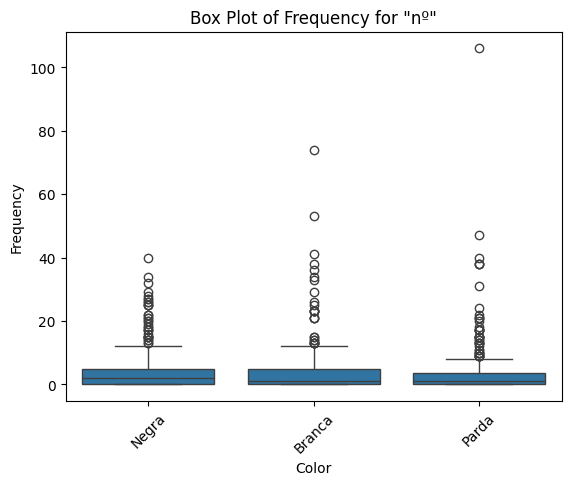

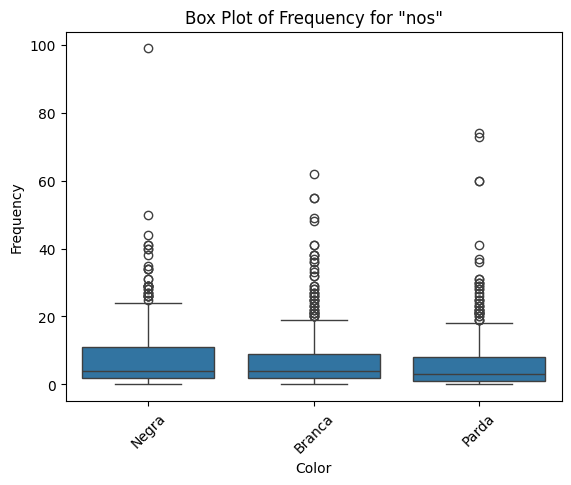

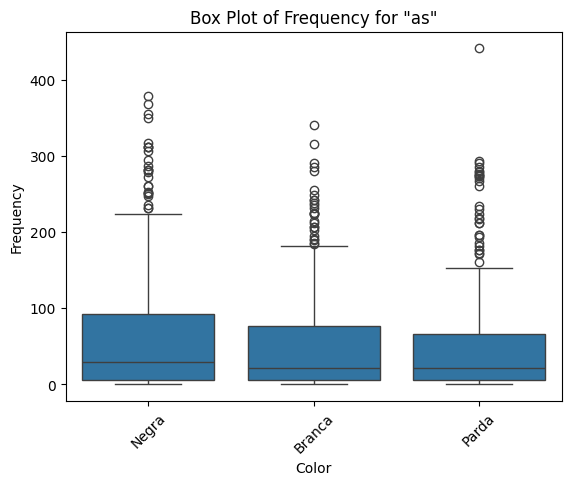

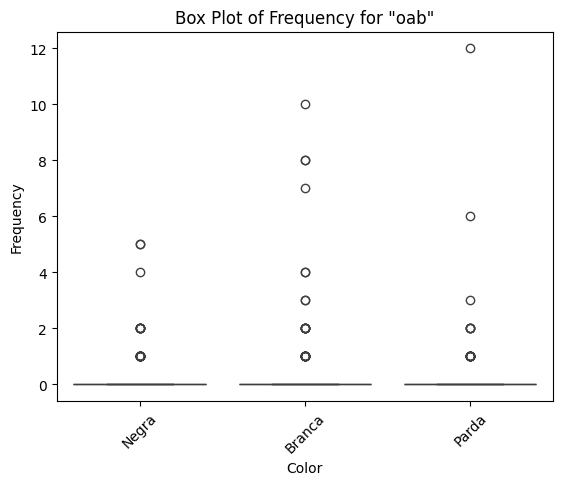

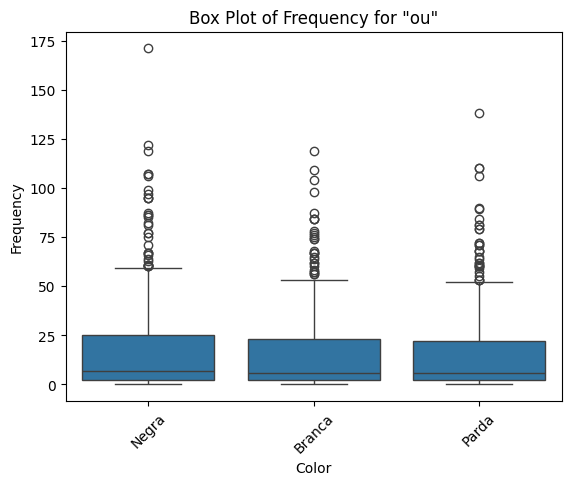

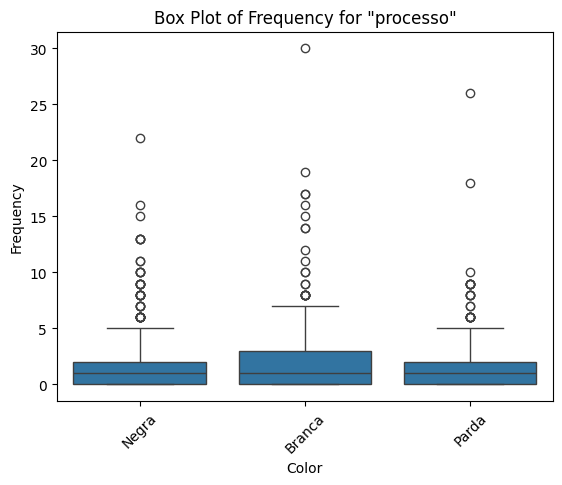

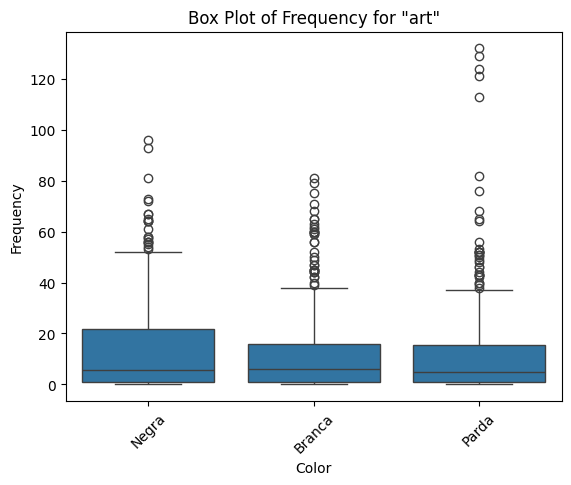

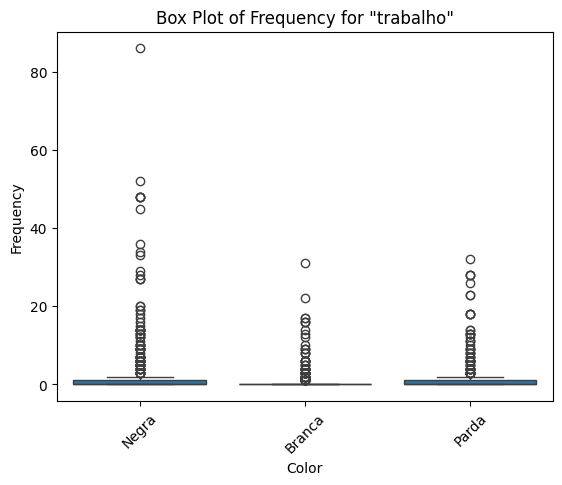

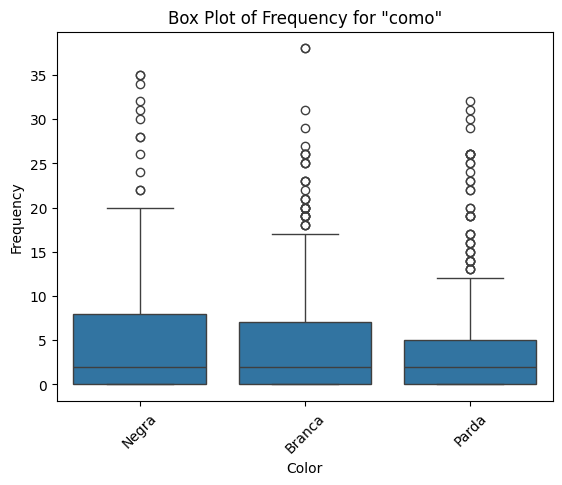

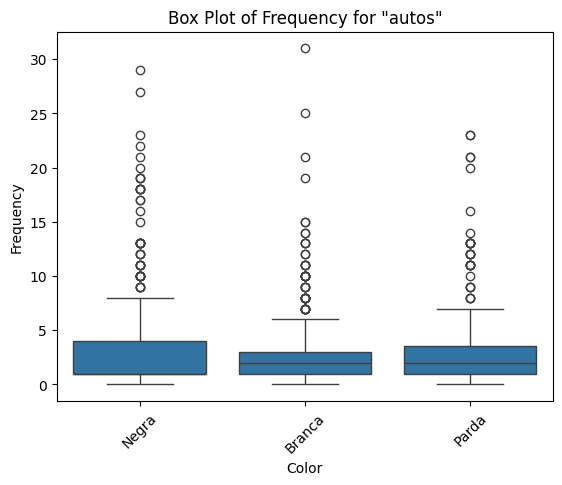

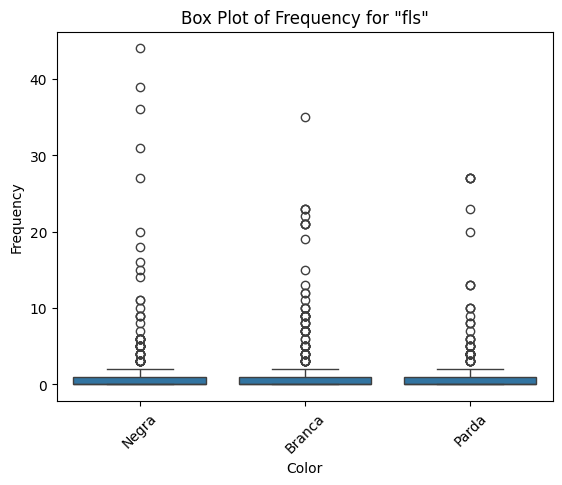

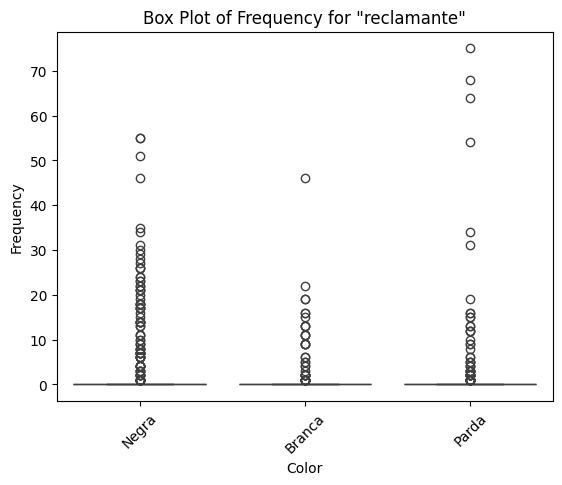

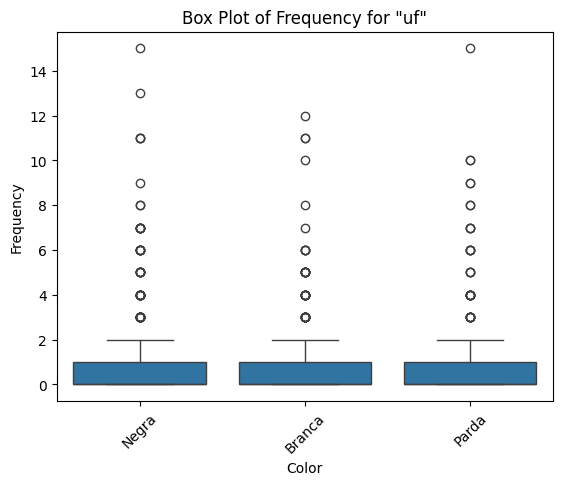

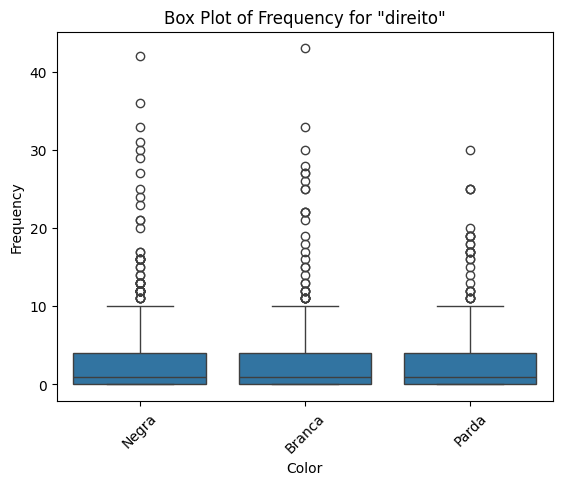

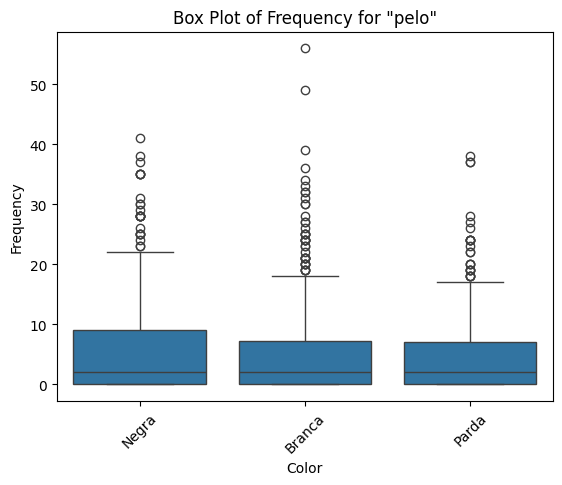

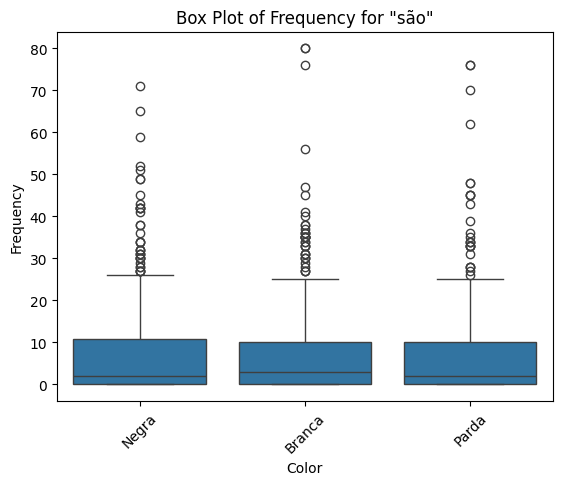

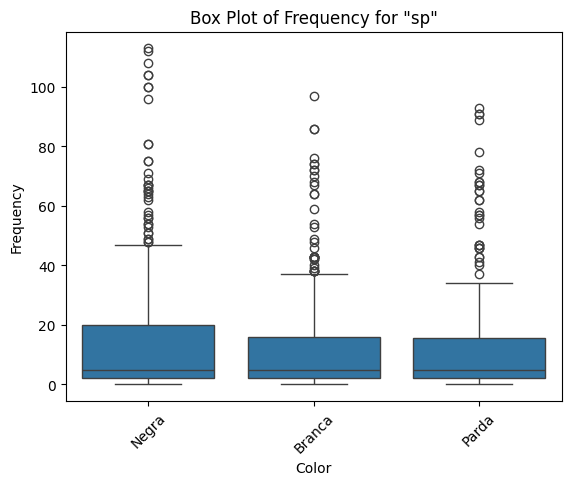

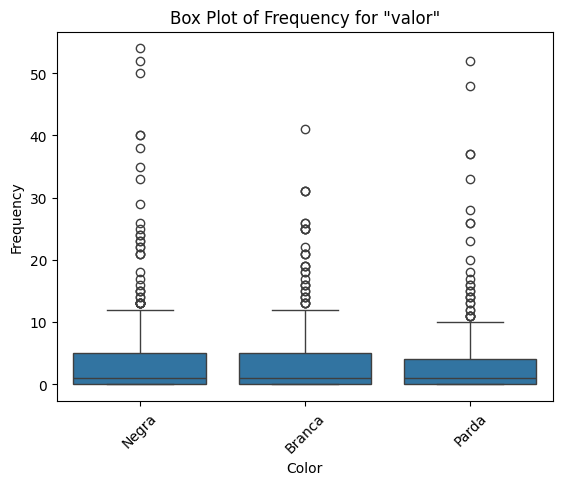

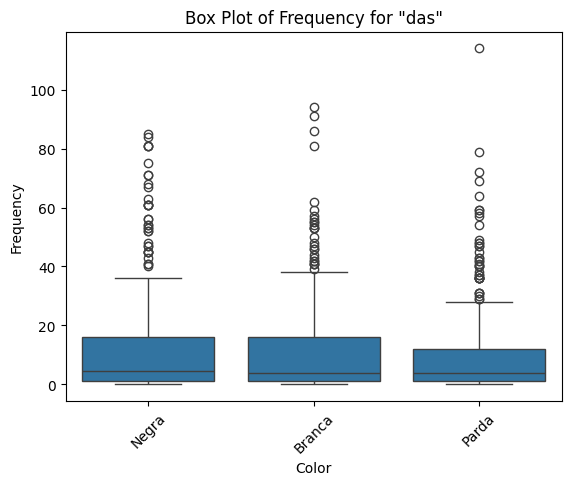

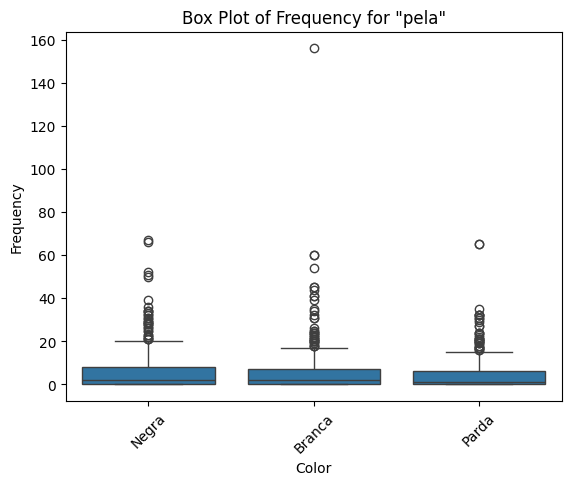

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
feature_names = vectorizer.get_feature_names_out()


word_frequencies = X_train.sum(axis=0).A1
df_frequencies = pd.DataFrame({"Word": feature_names, "Frequency": word_frequencies})

top_10_words = df_frequencies.nlargest(100, 'Frequency')
top_10_words = top_10_words.iloc[20:40]
df_top_10_words = df[df['Original_Text'].str.contains('|'.join(top_10_words['Word'].tolist()))]

for word in top_10_words['Word']:
    df_top_10_words[word + "_Frequency"] = df_top_10_words['Original_Text'].str.count(word)


for word in top_10_words['Word']:
    # Filtrar o DataFrame para incluir apenas as colunas relevantes
    df_word = df_top_10_words[['Color', word + "_Frequency"]]
    
    # Plotar o boxplot
    sns.boxplot(data=df_word, x='Color', y=word + "_Frequency")
    plt.title(f'Box Plot of Frequency for "{word}"')
    plt.xlabel('Color')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  
    plt.show()

In [193]:
top_10_words

,Word,Frequency
17528,de,303.674194
20191,do,135.935057
17347,da,121.379224
42477,que,107.998702
0,00,84.226913
21378,em,77.567953
1,000,63.808407
46155,se,55.264990
35704,no,50.949583
36851,não,48.557624
